# Portfolio Optimization using Monte Carlo Simulation

Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk. In this part, we design a system which could return optimal portfolio weights as long as users input their target stock and time. For example, we consider a portfolio made up of 4 banking stocks, and optimize their weights to achieve maximum expected return for a given level of volatility. 

The main step of this part will include:
    
1. Extract stock price of companies

2. calculate daily returns

3. Use Monte Carlo to generate 20,000 portfolios

4. Calculate risk & returns of the portfolios

5. Plot risk-return of the portfolios

6. Display the allocation of Best Portfolios

# 0. Import Data

In [4]:
pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
import quandl

# 1. Create a portfolio of stocks

The first step is to import the requisite stocks data we’re going to be working with from quandl. We will work with a bunch of banking stocks namely, JP Morgan, Citi, Bank of America and Wells Fargo. Let’s take 5 years of adjusted close prices from 2013 to 2018 to create a stock portfolio and do our analysis.



In [6]:
def get_data(startday,endday,list_of_company):
    stock = []
    start = pd.to_datetime(startday)
    end = pd.to_datetime(endday)
    # Grabbing a bunch of banking stocks for our portfolio
    for i in range(len(list_of_company)):
        id = "WIKI/{}.11".format(list_of_company[i])
        #print(id)
        stock.append(quandl.get(id,start_date=start,end_date=end))
        stock[i].to_csv(str(list_of_company[i])+'_CLOSE')
    
    return stock


In [7]:
list_of_company = ['jpm','c','bac','wfc']
startday = '2015-01-01'
endday = '2018-01-01'

In [8]:
stock_data = get_data(startday,endday,list_of_company)

In [9]:
stock_data

[            Adj. Close
 Date                  
 2015-01-02   58.152827
 2015-01-05   56.347474
 2015-01-06   54.886441
 2015-01-07   54.970195
 2015-01-08   56.198579
 ...                ...
 2017-12-22  107.450000
 2017-12-26  107.020000
 2017-12-27  107.220000
 2017-12-28  107.790000
 2017-12-29  106.940000
 
 [754 rows x 1 columns],
             Adj. Close
 Date                  
 2015-01-02   52.829656
 2015-01-05   51.164733
 2015-01-06   49.363501
 2015-01-07   49.821112
 2015-01-08   50.570814
 ...                ...
 2017-12-22   75.490000
 2017-12-26   74.780000
 2017-12-27   74.890000
 2017-12-28   75.080000
 2017-12-29   74.410000
 
 [754 rows x 1 columns],
             Adj. Close
 Date                  
 2015-01-02   17.221569
 2015-01-05   16.721277
 2015-01-06   16.220986
 2015-01-07   16.297954
 2015-01-08   16.634688
 ...                ...
 2017-12-22   29.880000
 2017-12-26   29.780000
 2017-12-27   29.730000
 2017-12-28   29.800000
 2017-12-29   29.520000
 
 [754 ro

So, what we have here is five years worth of time series data from 2015 to 2018 in a simple dataframe for each of the four stocks. Each dataframe contains a date column as index and a column for adjusted close price.

# 2. Normalizing Prices

Next, we will normalize the prices by taking the adjusted close price at a particular date and dividing it by the very initial adj. close price. The normalized prices are stored in a new column called ‘Normed Return’.

In [10]:
for i in range(len(list_of_company)):
    stock_data[i]['Normed Return'] = stock_data[i]['Adj. Close']/stock_data[i].iloc[0]['Adj. Close']
stock_data[0].head()

,Adj. Close,Normed Return
Date,,
2015-01-02,58.152827,1.000000
2015-01-05,56.347474,0.968955
2015-01-06,54.886441,0.943831
2015-01-07,54.970195,0.945271
2015-01-08,56.198579,0.966395


# 3. Allocations

Next, we’ll assign an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these four stocks. They must add up to 1.



Let’s assume we had the following allocations for our total portfolio:

30% in JP Morgan Chase

20% in Citi

40% in Bank of America

10% in Wells Fargo

Let’s have these values be reflected by multiplying our Normalized Returns by our allocations.



In [11]:
allocation = [.3,.2,.4,.1]

In [12]:
def allocate(df,a):
    for stock, allo in zip(df,a):
        stock['Allocation'] = stock['Normed Return']*allo
        #print(stock)
#stock_data[0].head()    

In [13]:
allocate(stock_data,allocation)

In [14]:
stock_data[0].head()

,Adj. Close,Normed Return,Allocation
Date,,,
2015-01-02,58.152827,1.000000,0.300000
2015-01-05,56.347474,0.968955,0.290687
2015-01-06,54.886441,0.943831,0.283149
2015-01-07,54.970195,0.945271,0.283581
2015-01-08,56.198579,0.966395,0.289918


# 4. Total Portfolio Value

So now we can get a better idea of how the returns are portfolio wise. Let’s assume we invested a million dollars in this portfolio.

In [15]:
def invest(df):
    for stock in df:
        stock['Position Values'] = stock['Allocation']*1000000    

In [16]:
invest(stock_data)
stock_data[0].head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2015-01-02,58.152827,1.000000,0.300000,300000.000000
2015-01-05,56.347474,0.968955,0.290687,290686.509842
2015-01-06,54.886441,0.943831,0.283149,283149.303889
2015-01-07,54.970195,0.945271,0.283581,283581.373020
2015-01-08,56.198579,0.966395,0.289918,289918.386942


Hence, (0.3 x 1 million dollars) is allocated in JP Morgan on day 1. So, this becomes our Position Value for JPM on day 1. At the very next day, since JPM went down the Position Value has now turned to a little less.

We can expand this idea to other stocks and create a larger dataframe containing position values of each stock and also the total portfolio value at the end of each day.

In [17]:
data = stock_data[0]['Position Values'].to_frame()
data

,Position Values
Date,
2015-01-02,300000.000000
2015-01-05,290686.509842
2015-01-06,283149.303889
2015-01-07,283581.373020
2015-01-08,289918.386942
...,...
2017-12-22,554315.273923
2017-12-26,552096.981063
2017-12-27,553128.745184


In [18]:
def portfolio_values(df,list):
    list_of_position = []
    list_of_colname = []
    for i in range(len(df)):
        list_of_position.append(df[i]['Position Values'].to_frame())
        list_of_colname.append(str(list[i])+' Pos')
    portfolio_val = pd.concat(list_of_position,axis=1)
    portfolio_val.columns = list_of_colname
    portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
    return portfolio_val
    

In [19]:
portfolio_val = portfolio_values(stock_data,list_of_company)

In [20]:
portfolio_val.head()

,jpm Pos,c Pos,bac Pos,wfc Pos,Total Pos
Date,,,,,
2015-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000
2015-01-05,290686.509842,193697.014375,388379.888268,97257.769653,970021.182138
2015-01-06,283149.303889,186877.994840,376759.776536,95228.519196,942015.594460
2015-01-07,283581.373020,188610.394397,378547.486034,95795.246801,946534.500251
2015-01-08,289918.386942,191448.580907,386368.715084,97915.904936,965651.587868


So, now we can see how our position values are changing on a day-to-day basis.

We can also plot the total portfolio values and individual position values on a graph.

Text(0.5, 1.0, 'Total Portfolio Value')

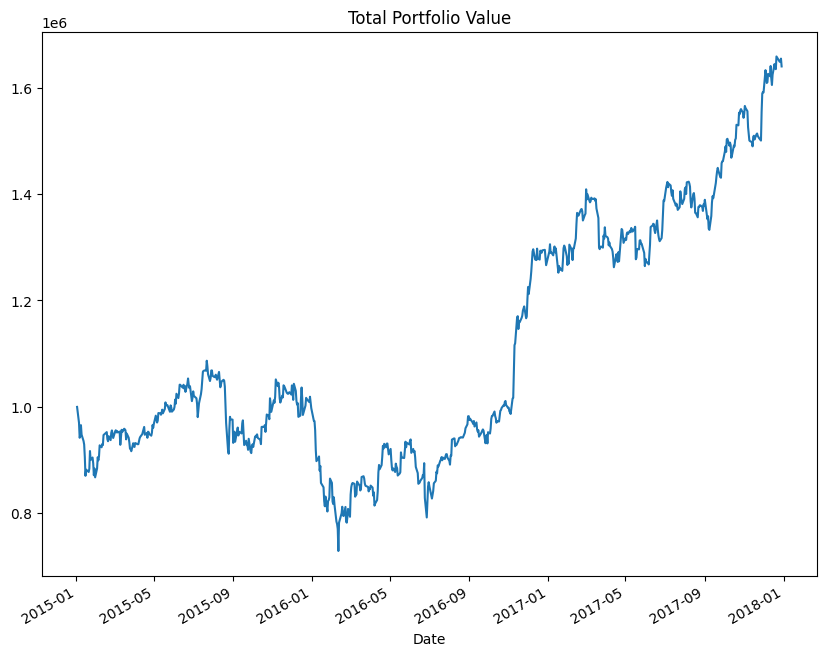

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<Axes: xlabel='Date'>

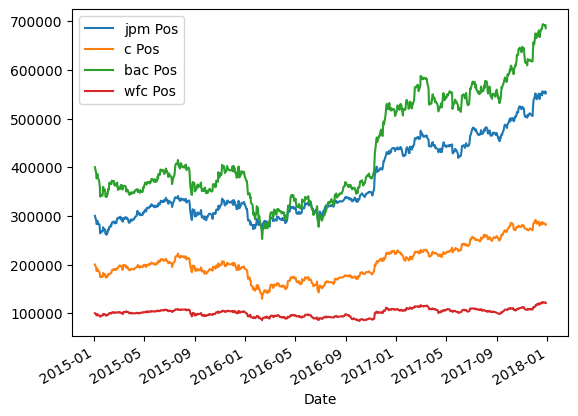

In [22]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line')

# 5. Portfolio Statistics

We are now going to calculate a bunch of portfolio statistics (like daily returns, average daily returns, standard deviation etc.) and later on use them to calculate sharpe ratio.


In [23]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,jpm Pos,c Pos,bac Pos,wfc Pos,Total Pos,Daily Return
Date,,,,,,
2015-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2015-01-05,290686.509842,193697.014375,388379.888268,97257.769653,9.700212e+05,-0.029979
2015-01-06,283149.303889,186877.994840,376759.776536,95228.519196,9.420156e+05,-0.028871
2015-01-07,283581.373020,188610.394397,378547.486034,95795.246801,9.465345e+05,0.004797
2015-01-08,289918.386942,191448.580907,386368.715084,97915.904936,9.656516e+05,0.020197
...,...,...,...,...,...,...
2017-12-22,554315.273923,285786.451417,694013.432864,122680.031661,1.656795e+06,-0.001167
2017-12-26,552096.981063,283098.567187,691690.764079,121842.897407,1.648729e+06,-0.004868
2017-12-27,553128.745184,283514.999955,690529.429687,121484.125585,1.648657e+06,-0.000044


In [24]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our cumulative return is {} percent!'.format(cum_ret))

Our cumulative return is 63.99599755213903 percent!


In [25]:
portfolio_val['Daily Return'].mean()


0.0007622297896266933

Mean daily return is 0.0007622297896266933

In [26]:
portfolio_val['Daily Return'].std()

0.014504584096345722

Standard deviation of daily returns is 0.01450458409634572

# 6.sharp ratio

The Sharpe ratio of a portfolio is the ratio of the expected excess return of the portfolio to the portfolio’s volatility. It is a measure for calculating risk-adjusted return, and has become the industry standard for such calculations.

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

Since the risk-free rate in the US is very low , we will assume a Risk free rate of 0.

In [27]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.05255095799808069

Sharpe Ratio = 0.0525509579980807

We can also compute annualized Sharpe Ratio as follows:

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

Daily = sqrt(252)
Weekly = sqrt(52)
Monthly = sqrt(12)


In [28]:
ASR = (252**0.5)*SR
ASR

0.8342205961267334

Annualized Sharpe Ratio is 0.8342205961267335

# 7. Portfolio Optimization using Monte Carlo Simulation

The question now arises that how do we choose what is the optimal amount of money to put in each of these stocks.

Portfolio optimization is nothing but finding the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

The total expected return for a portfolio is given by:



<center>$E$($R_p$) = $\sum_{i}^{}{w_i}$ $E$($R_i$)</center>

The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

<center>$\sigma^2_p$ = $\sum_{i}^{}{w^2_i\sigma^2_i}$ + $\sum_{i}^{}{}$$\sum_{j \neq i}^{}{w_iw_j\sigma_i\sigma_j\rho_{ij}}$</center>

We can randomly try to find the optimal portfolio balance using Monte Carlo simulation.

Firstly, let’s just download our stocks data from the .csv files we created earlier and concatenate them together.

In [29]:
def daily_returns(df,list):
    list_of_close = []
    list_of_colname = []
    for i in range(len(df)):
        list_of_close.append(df[i]['Adj. Close'].to_frame())
        list_of_colname.append(str(list[i]))
    stocks_df = pd.concat(list_of_close,axis=1)
    stocks_df.columns = list_of_colname
    return stocks_df

In [30]:
stocks_df = daily_returns(stock_data,list_of_company)
stocks_df.head()

,jpm,c,bac,wfc
Date,,,,
2015-01-02,58.152827,52.829656,17.221569,50.171164
2015-01-05,56.347474,51.164733,16.721277,48.795355
2015-01-06,54.886441,49.363501,16.220986,47.777257
2015-01-07,54.970195,49.821112,16.297954,48.061590
2015-01-08,56.198579,50.570814,16.634688,49.125549


We will now switch over to using log returns instead of arithmetic returns, as they are more convenient to work with many of the algorithms in technical analysis which require detrending/normalizing the time series.

In [31]:
log_ret = np.log(stocks_df/stocks_df.shift(1))
log_ret.head()

,jpm,c,bac,wfc
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.031537,-0.032022,-0.029481,-0.027805
2015-01-06,-0.026271,-0.035839,-0.030376,-0.021085
2015-01-07,0.001525,0.009228,0.004734,0.005934
2015-01-08,0.022100,0.014936,0.020451,0.021896


In [32]:
#calculate the log return mean of each stock
log_ret.mean() * 252

jpm    0.203874
c      0.114627
bac    0.180351
wfc    0.063589
dtype: float64

Now, let’s run a single run for a random allocation.

In [33]:
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks_df.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['jpm', 'c', 'bac', 'wfc'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.1450872701152256


Expected Volatility
0.22158198008262628


Sharpe Ratio
0.6547791930603907


Now, we can just run this many times over.

In [34]:
num_ports = 20000

all_weights = np.zeros((num_ports,len(stocks_df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

Let’s get the maximum value of sharpe ratio obtained from all the runs:

In [39]:
sharpe_arr.max()

0.917558009944895

Let’s also find the index location of the above sharpe value:

In [40]:
sharpe_arr.argmax()

16448

Now, we can take the index location and find the weights corresponding to that location:

In [41]:
all_weights[16448,:]

array([0.90125757, 0.02753532, 0.03665457, 0.03455254])

Let’s plot all the portfolio combination runs on a graph and point out the maximum sharpe ratio.

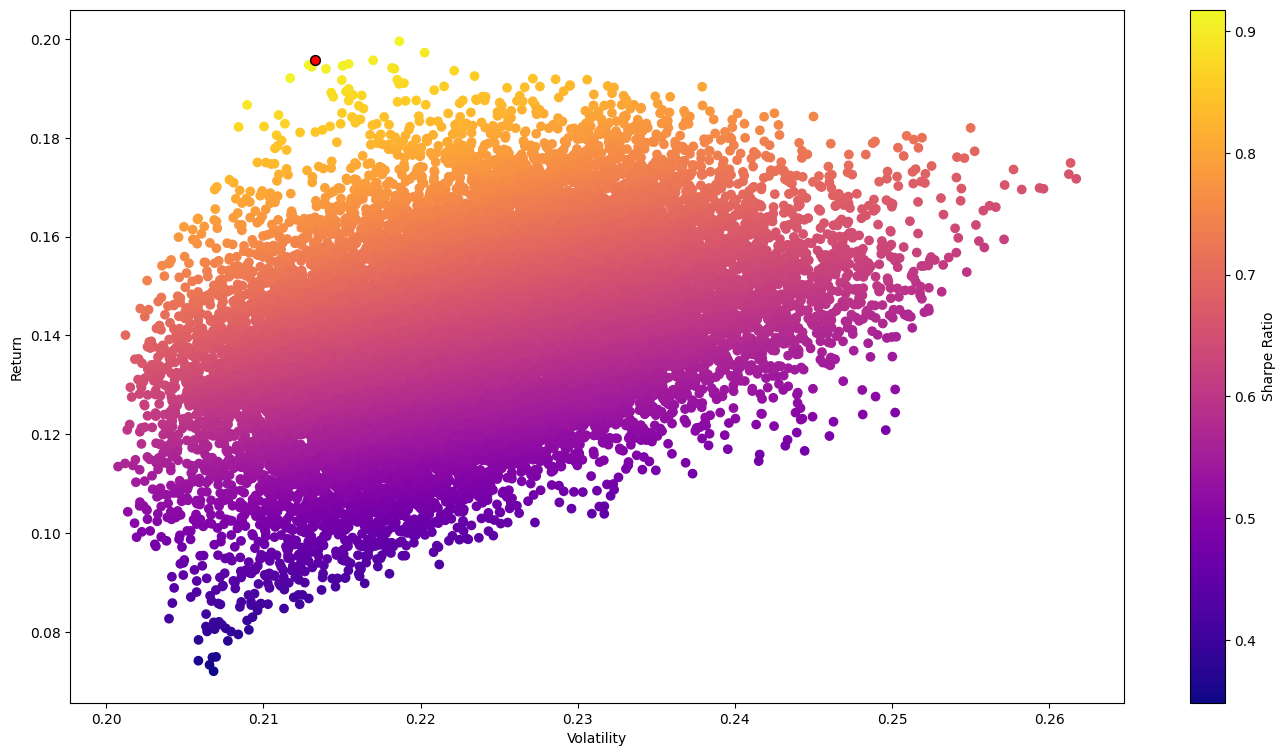

In [42]:
max_sr_ret = ret_arr[16448]
max_sr_vol = vol_arr[16448]
plt.figure(figsize=(17,9))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

So what we can see above is the Return vs Volatility plot colored by the sharpe ratio. The maximum sharpe ratio (0.918) is represented by the red dot with a return of around 0.195 and volatility around 0.213.

# 8. Testing

In [43]:
import yfinance as yf

In [44]:
list_of_company = ['jpm','c','bac','wfc']
startday_test = '2018-01-01'
endday_test = '2019-01-01'

In [45]:
startday_test

'2018-01-01'

In [46]:
def get_data(startday,endday,list_of_company):
    stock = []
    # Grabbing a bunch of banking stocks for our portfolio
    for i in range(len(list_of_company)):
        stock_name = list_of_company[i]
        stock.append(yf.download(stock_name, startday, endday, interval="1d")['Adj Close'])
        stock[i].to_csv(str(list_of_company[i])+'_CLOSE_Test')
    
    return stock

In [47]:
test_stock_data = get_data(startday_test,endday_test,list_of_company)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
test_stock_data

[Date
 2018-01-02    91.977730
 2018-01-03    92.071465
 2018-01-04    93.390434
 2018-01-05    92.790886
 2018-01-08    92.927933
                 ...    
 2018-12-24    80.305603
 2018-12-26    83.634979
 2018-12-27    84.576279
 2018-12-28    84.393227
 2018-12-31    85.081764
 Name: Adj Close, Length: 251, dtype: float64,
 Date
 2018-01-02    62.128342
 2018-01-03    62.320503
 2018-01-04    63.089184
 2018-01-05    63.005630
 2018-01-08    62.270359
                 ...    
 2018-12-24    42.068913
 2018-12-26    43.930668
 2018-12-27    44.212498
 2018-12-28    44.263733
 2018-12-31    44.460167
 Name: Adj Close, Length: 251, dtype: float64,
 Date
 2018-01-02    26.632410
 2018-01-03    26.543335
 2018-01-04    26.890720
 2018-01-05    27.015415
 2018-01-08    26.828369
                 ...    
 2018-12-24    20.618204
 2018-12-26    21.869993
 2018-12-27    22.105833
 2018-12-28    22.123974
 2018-12-31    22.350752
 Name: Adj Close, Length: 251, dtype: float64,
 Date
 2018-01-0

Assume we have $100,000 to invest at Jan 1 2018.

In [49]:
p0 = 1 #1000000

## (1) Baseline

First let's calculate the baseline, which means we use the same weight of each stock.

In [50]:
invest1 = p0/4
n11 = invest1/test_stock_data[0][0] #number of JPM
n22 = invest1/test_stock_data[1][0] #number of citi
n33 = invest1/test_stock_data[2][0] #number of bac
n44 = invest1/test_stock_data[3][0] #number of wfc

In [51]:
#calculate the portfolio price at 12/31/2018
pt1 = n11*test_stock_data[0][-1]+n22*test_stock_data[1][-1]+n33*test_stock_data[2][-1]+n44*test_stock_data[3][-1]

In [52]:
pt1

0.8140521706743202

The portfolio price at Dec 31 2018 is 814052.178966301, which is the baseline.

In [53]:
profit1 = pt1-p0
profit1

-0.18594782932567977

So the profit of baseline from 2018 to 2019 is -185948.

## (2) Optimal Portfolio

Now let's calculate the profit of the optimal portfolio.

In [54]:
#calculate the number of each stock in the portfolio
invest = all_weights[16448,:]*p0
n1 = invest[0]/test_stock_data[0][0] #number of JPM
n2 = invest[1]/test_stock_data[1][0] #number of citi
n3 = invest[2]/test_stock_data[2][0] #number of bac
n4 = invest[3]/test_stock_data[3][0] #number of wfc

In [55]:
#calculate the portfolio price at 12/31/2018
pt = n1*test_stock_data[0][-1]+n2*test_stock_data[1][-1]+n3*test_stock_data[2][-1]+n4*test_stock_data[3][-1]

In [56]:
pt

0.9109771509945139

In [58]:
profit = pt-p0 #910977-1000000
profit

-0.08902284900548607

So the profit of optimal portfolio from 2018 to 2019 is -89023.

By comparing the results of baseline and optimal portfolio, we could see although both have a loss since all the 4 stock price had dropped during 2018, the loss of optimal portfolio is still much lower than that of the baseline.
This indicates the Monte-Carlo method does help us to choose the better portfolio weights.